# EXPLORATORY DATA ANALYSIS 
---

In [1]:
import pandas as pd
import utils as eda
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# DATASET
total_data = pd.read_csv(r'C:\Users\rnogu\OneDrive\Documentos\GitHub\Linear-regression-model\data\interim\eda_total_data.csv')
#TARGET VARIABLE
target = 'charges'

<small> Note: The 'utils.py' file contains **specific functions** according to the standards of Exploratory Data Analysis (EDA) and Descriptive Data Analysis (DDA). The functions with the prefix 'eda' are described in the 'utils.py' doc <small>

## Step 1: Multivariable analysis
---

_NOTE: Since there are categorical variables, a factorization process will be made._

The variable will have the following numbers:
1. Sex
- female 0
- male 1

2. Smoker
- yes 0
- no 1

3. Region
- southwest 0
- southeast 1
- northwest 2
- northeast 3

In [2]:
categoric = ["sex", "smoker", "region"]

# LOOP FOR FACTORIZATION
for x in total_data[categoric]:
    total_data[x] = pd.factorize(total_data[x])[0] 

# SEE RESULTS
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


### 1.2. Numerical - Numerical analysis between predictors and target:

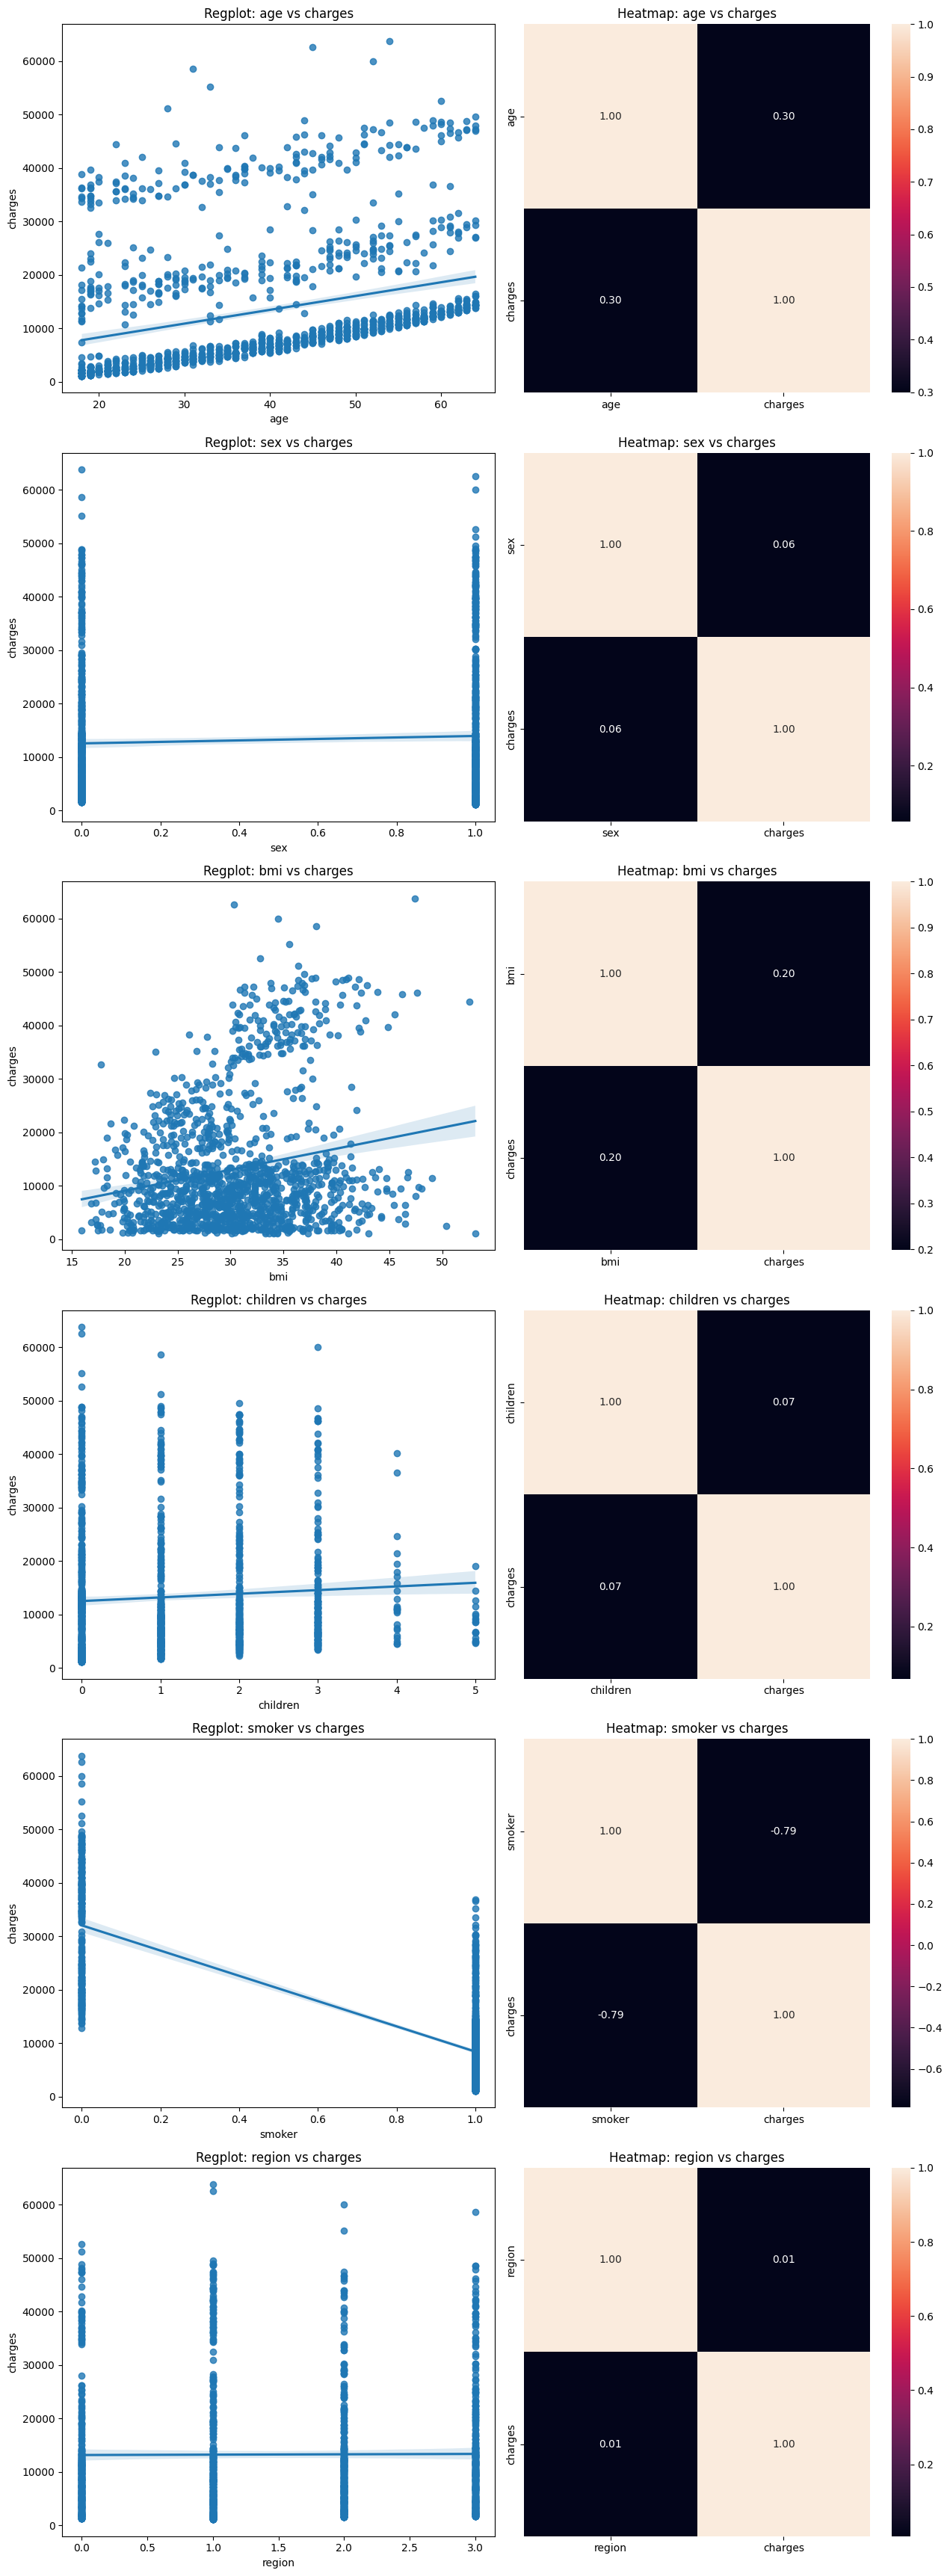

In [3]:
# CUSTOM FUNCTION FOR NUMERICAL-NUMERICAL ANALYSIS
eda.plot_scatter_heatmaps(total_data,target)

### 1.3. General correlation heatmap:

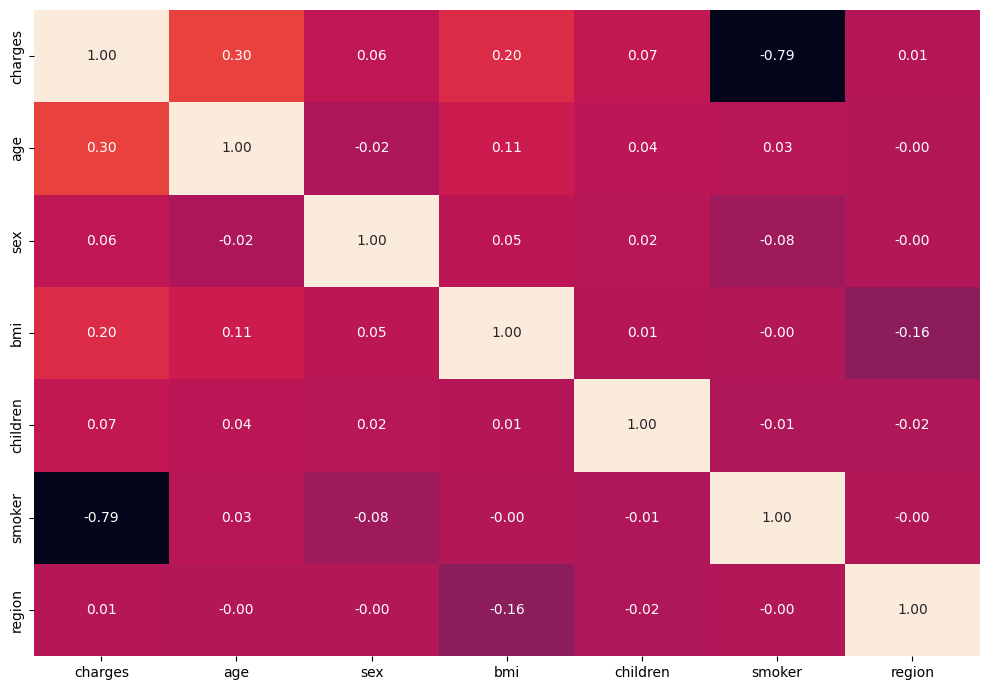

In [4]:
eda.general_heatmap(total_data,target)

The numerical-numerical analysis yields the following conclusions:
- there is one strong correlation, which is **smoker** (-0.79).
- there are two medium correlations, which are **age** (0.30) and **bmi** (0.20)
- there are three weak correlations, which are **children** (0.07), **sex** (0.06) and **region** (0.01)

### 1.4. General dataset scatter plot:

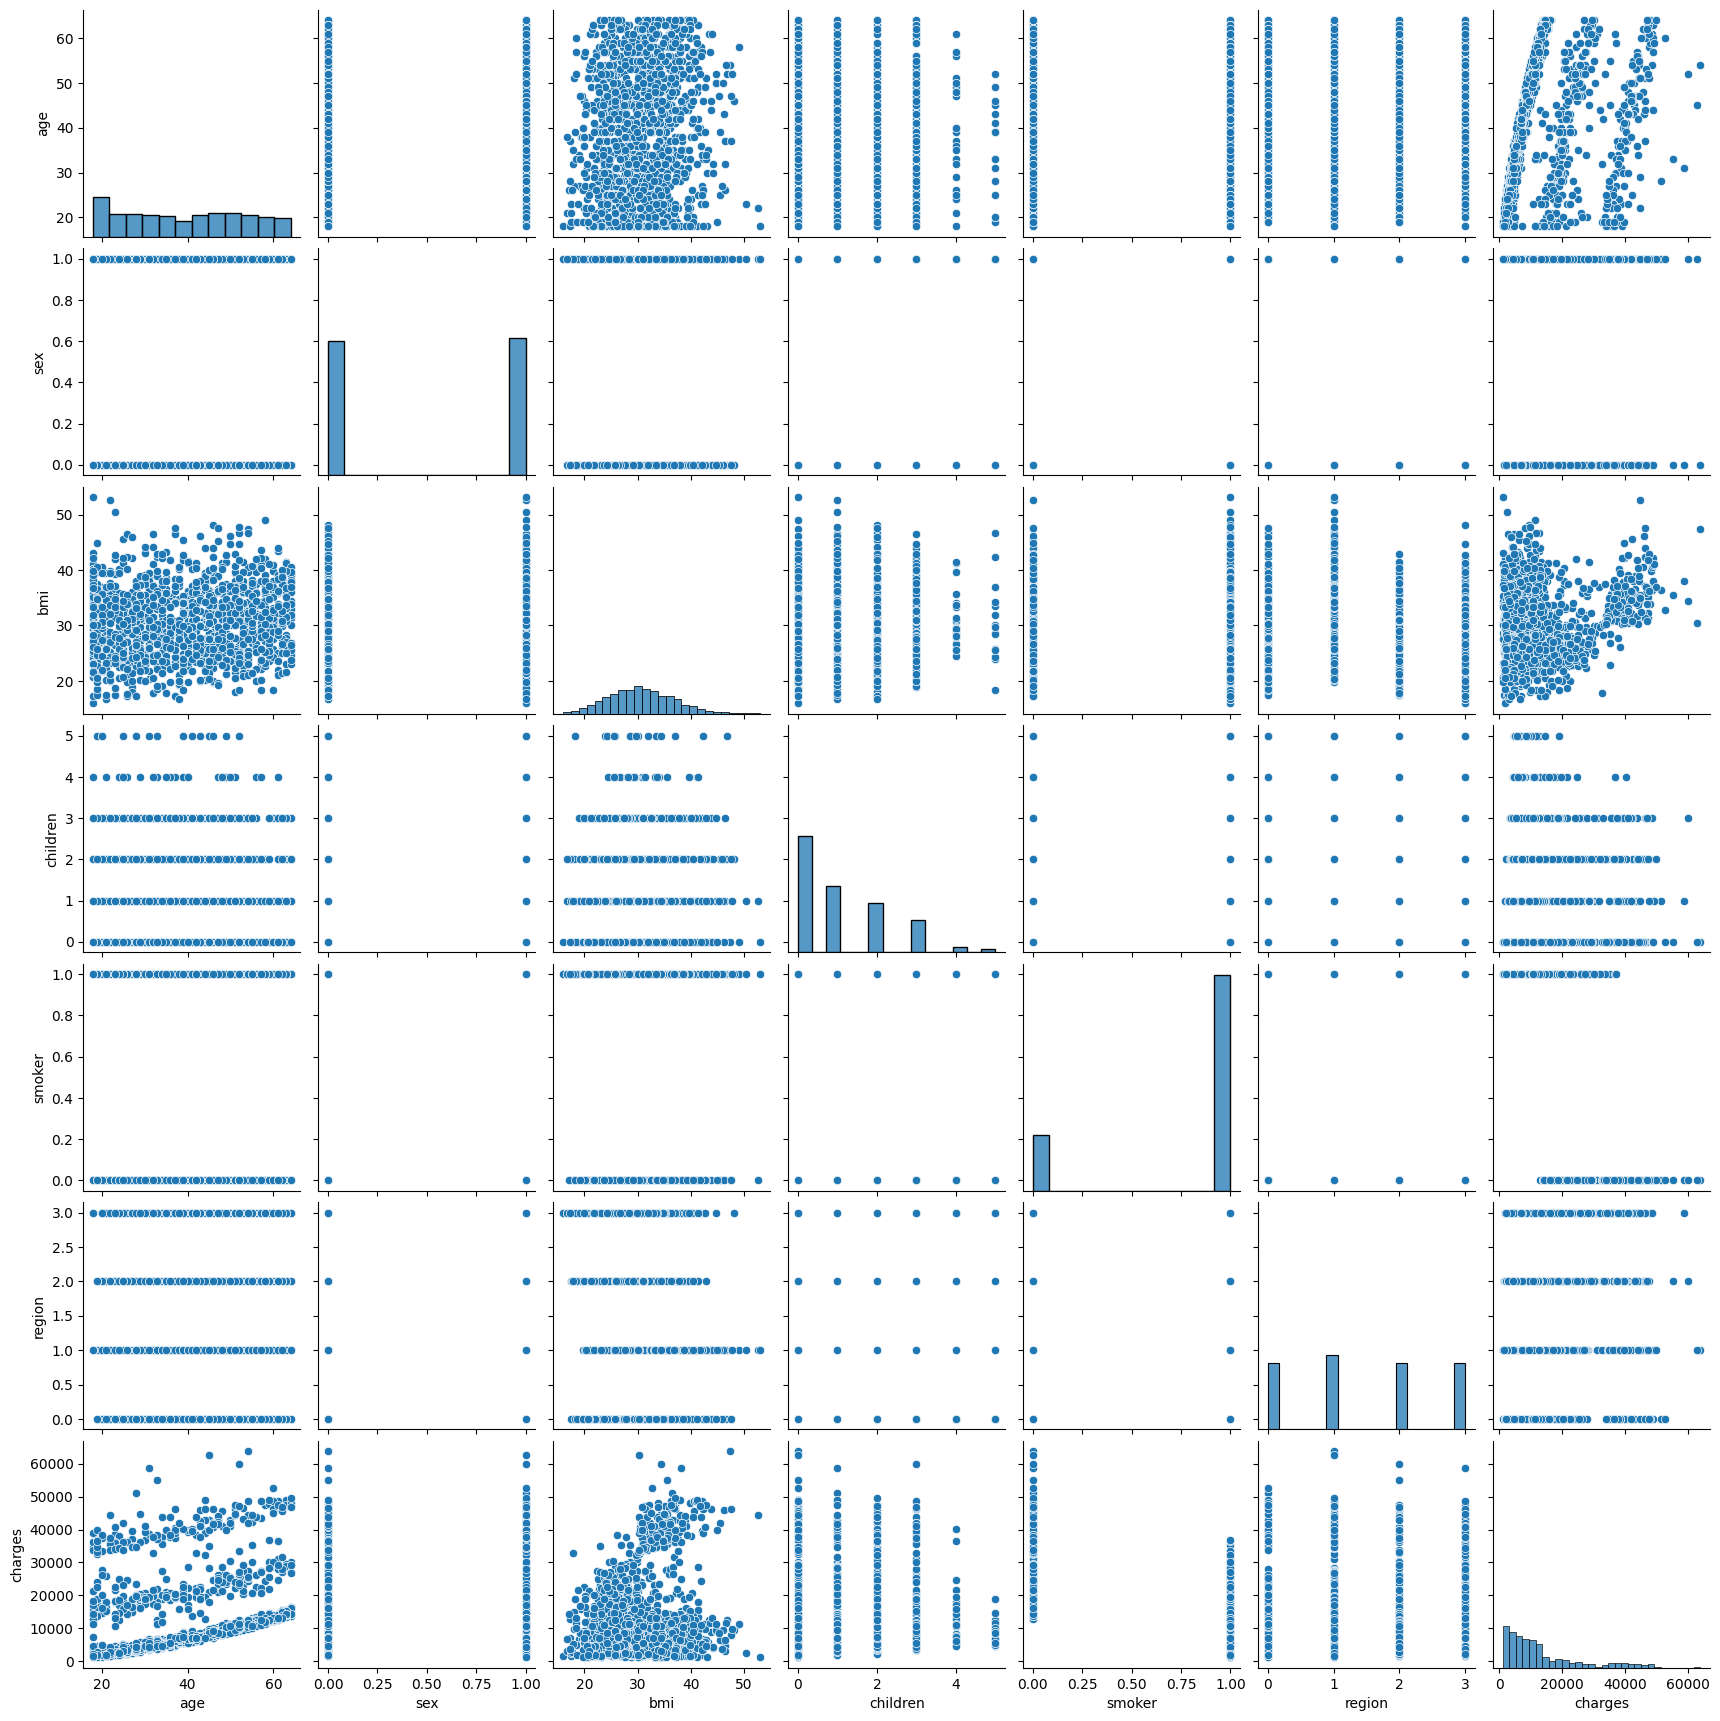

In [5]:
# General pairplot
sns.pairplot(data = total_data)

## STEP 2: FEATURE ENGINEERING

---

### 2.1. Outiler analysis:

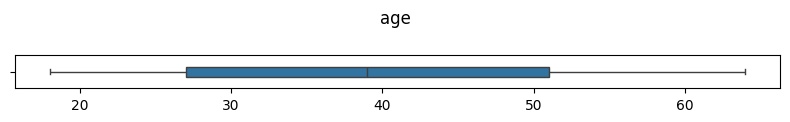

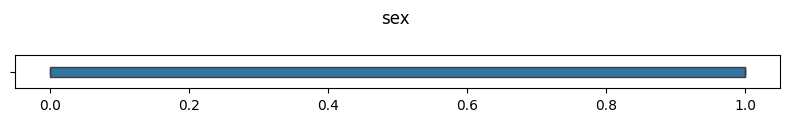

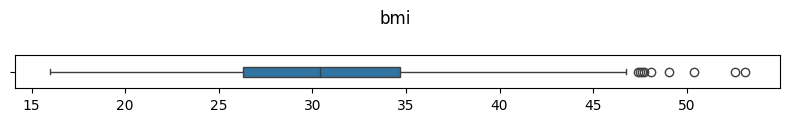

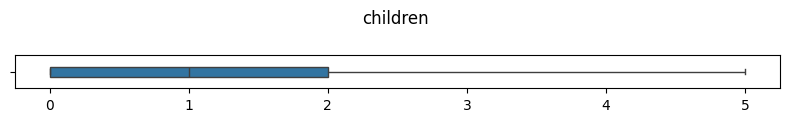

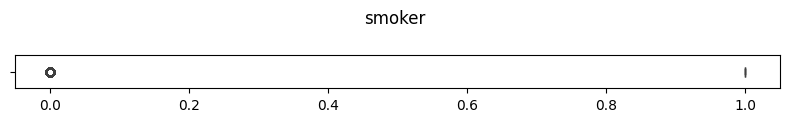

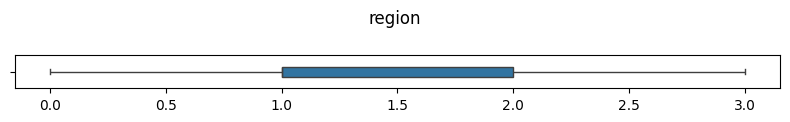

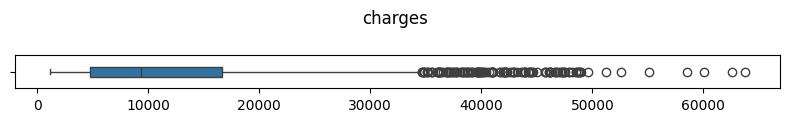

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.795217,0.403694,0.0000,1.00000,1.000,1.000000,1.00000
region,1338.0,1.484305,1.104885,0.0000,1.00000,1.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
# CUSTOM FUNCTION for standard outlier analysis (graph and description)
eda.outlier_analysis(total_data,'Outcome')

The analysis shows that the only predictor variable with statistical outliers is bmi. According to the _Centers for Disease Control and Prevention*_, despite the fact that is unhealthy, it is possible to have bmi values up to 55.

In consecuence, the values will stay without modification.


*https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

## Step 3: Feature engineering
---
_NOTE: Following the completion of the research, it is determined that there are no viable options for merging variables or generating new features. Also, the dataset will only take the three variable with the strongest correlation._

### 3.1. Train / Test division

In [7]:
from sklearn.model_selection import train_test_split

variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
# We divide the dataset into training and test samples
X = total_data.drop(target, axis = 1)[variables]
y = total_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()


,age,sex,bmi,children,smoker,region
560,46,0,19.95,2,1,2
1285,47,0,24.32,0,1,3
1142,52,0,24.86,0,1,1
969,39,0,34.32,5,1,1
486,54,0,21.47,3,1,2


### 3.2. Standard value scalation

In [14]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X_train and X_test are DataFrames and 'variables' is a list of column names
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform and create a DataFrame with normalized values for training data
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=variables)

# Use the same scaler to transform and create a DataFrame with normalized values for testing data
X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=variables)

# Display the first few rows of the normalized training data
X_train_norm.head()

X_train_norm[target] = list(y_train)
X_test_norm[target] = list(y_test)

X_train_norm.to_csv("norm_insurance_train.csv", index=False)
X_test_norm.to_csv("norm_insurance_test.csv", index=False)

## GENERAL CONCLUSIONS OF EDA ANALYSIS
---

1. The dataset consisted in 8 variables, including numerical target 'charges'. No data-entry errors were found and 12 duplicated rows were dropped. Also, the predictor ID was also dropped due to lack of importance. All the categoric predictors were factorized.  

2. The correlation heatmap provided the following results:
- there is one strong correlation, which is **smoker** (-0.79).
- there are two medium correlations, which are **age** (0.30) and **bmi** (0.20)
- there are three weak correlations, which are **children** (0.07), **sex** (0.06) and **region** (0.01)

3. The outlier analysis showed few statistical outliers, most of them in BMI predictor. After OSINT research, the statisticals outliers of BMI were confirmed as correct entries.

4. The dataset was factorized. The selection of best features will be made in the following notebook.

5. On the overall, this dataset seems to have enough information to perform a machine learning algorithm.